#### The following approch was implement for the purpose of learning Hand Written Digit Recognition, for Digit Recognisition competition held on Kaggle

#### By following the following approch the model has achieved an accuracy of 99.5%

 Importing all the required libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

following code block, reads the input data, and performs data preprocessing:
    - extracting the target labels from training data
    - comverting the data from dataframe to numpy array
    - reshaping the data from a row of 784 numbers to a matrix or order 2 tensor of (28 * 28) size
    - converting the data to float type and nurmalizing it

In [2]:
training_data1 = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
training_labels1 = training_data1.label
training_data1 = training_data1.drop(['label'],axis=1)

training_data1 = training_data1.to_numpy()
training_data1 = training_data1.reshape(training_data1.shape[0],28,28,1)
training_data1 = training_data1.astype('float32')
training_data1 /= 255
training_data1.shape

(60000, 28, 28, 1)

then the labels extracted from the training data are one-hot encoded to a tensor with 10 values

In [3]:
training_labels1 = tf.keras.utils.to_categorical(training_labels1,num_classes=10)
training_labels1.shape

(60000, 10)

below is the model architecture, chich consists of
    - 3 sets of convolution layers followed by max pooling layer
    - flattening the data
    - followed by 3 dense layers

In [1]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1),
                           activation='relu',
                           
                           padding='same'),
    
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NameError: name 'tf' is not defined

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(training_data1,training_labels1,test_size=0.2)

history = model.fit(training_data1,training_labels1,
          epochs=10,
         validation_data=(x_val,y_val)
         )

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1268 - accuracy: 0.9597 - val_loss: 0.0336 - val_accuracy: 0.9894
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0344 - val_accuracy: 0.9901
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0185 - val_accuracy: 0.9951
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0202 - val_accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.0110 - val_accuracy: 0.9966
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0110 - val_accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0150 - accuracy: 0.9957 - val_loss: 0.0173 - val_accuracy:

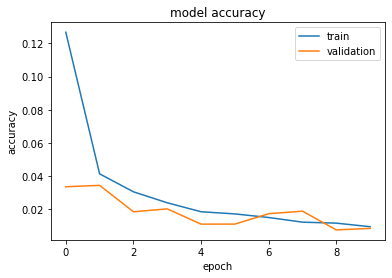

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [44]:
testing_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
testing_data = testing_data.to_numpy()
testing_data = testing_data.reshape(-1,28,28,1)
testing_data = testing_data.astype('float32')
testing_data /= 255

test_predictions = model.predict_classes(testing_data)
image_ids =  np.arange(1,28001)
submission = pd.DataFrame({"ImageId":image_ids,"Label":test_predictions})
submission.to_csv('submission_digit_recignizer.csv',index=False)